In [596]:
from pprint import pprint
import  numpy as np
import numpy.linalg as la
from scipy.sparse import random
import scipy.sparse as sparse

In [597]:
def jacobi(A,x,b,max_iter = 100,epsilon = 10e-5,w=1/100):
    D = np.diag(np.diag(A))
    norm_b = la.norm(b)
    D_inv = la.inv(D)
    r_vector = []
    for i in range(max_iter):
        x = x + w * D_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector

In [598]:
def Gauss_Seidal(A,x,b,max_iter = 100,epsilon = 10e-4):
    # todo: understand it better :(
    M = np.tril(A) # represent L + D
    norm_b = la.norm(b)
    M_inv = la.inv(M)
    r_vector = []
    for i in range(max_iter):
        x = x + M_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector


In [599]:
def SD(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * rk
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
            break
    return x,r_vector

In [600]:
def CG(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    rk = b - A @ x
    p = np.array(rk)
    r_vector = []
    for i in range(max_iter):
        r_prev = np.array(rk)
        alpha = (rk @ rk) / (p @ (A@p))
        x = x + alpha * p
        rk = b - A @ x
        r_norm = la.norm(rk)
        r_vector.append(r_norm)
        if r_norm / norm_b < epsilon:
            break
        beta = np.inner(rk,rk) / np.inner(r_prev,r_prev)
        p = rk + beta * p

    return x,r_vector

type <class 'numpy.ndarray'>
(256, 256)



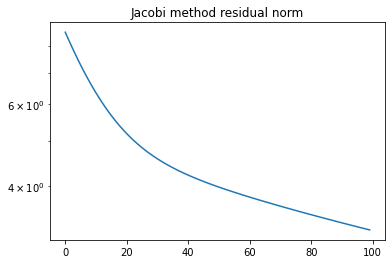

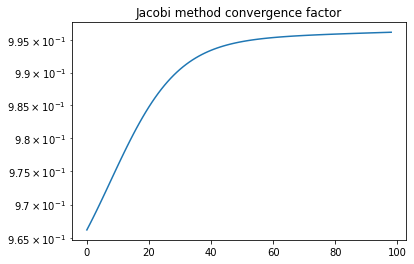

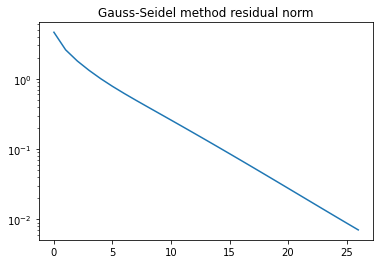

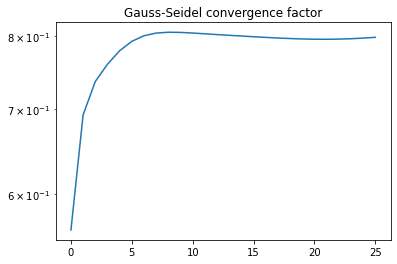

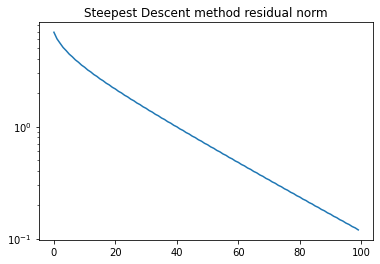

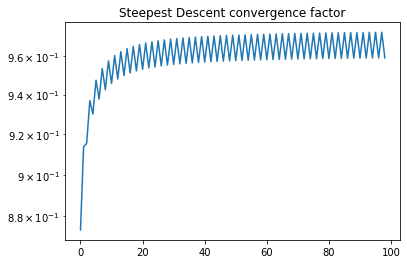

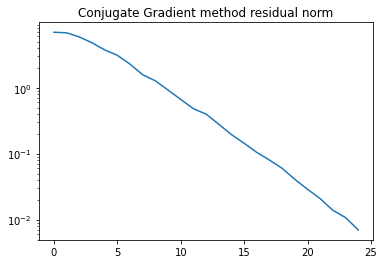

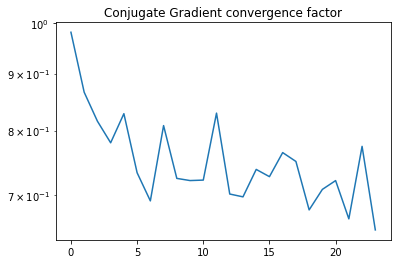

In [601]:
n = 256
A = random(n, n, 5 / n, dtype=float)
v = np.random.rand(n)
v = sparse.spdiags(v, 0, v.shape[0], v.shape[0], 'csr')
A = A.transpose() * v * A + 0.1*sparse.eye(n)
b = np.random.rand(n)
x_start = np.zeros(n)
A = np.array(A.toarray())
print(f'type {type(A)}')
print(A.shape)
print()

x_jacobi,r_jacobi = jacobi(A,x_start,b)
x_gs, r_gs = Gauss_Seidal(A,x_start,b)
x_sd, r_sd = SD(A,x_start,b)
x_cg, r_cg = CG(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_jacobi)
plt.title("Jacobi method residual norm")
plt.show()
plt.semilogy(np.divide(r_jacobi[1:],r_jacobi[0:-1]))
plt.title("Jacobi method convergence factor")
plt.show()
plt.semilogy(r_gs)
plt.title("Gauss-Seidel method residual norm")
plt.show()
plt.semilogy(np.divide(r_gs[1:],r_gs[0:-1]))
plt.title("Gauss-Seidel convergence factor")
plt.show()
plt.semilogy(r_sd)
plt.title("Steepest Descent method residual norm")
plt.show()
plt.semilogy(np.divide(r_sd[1:],r_sd[0:-1]))
plt.title("Steepest Descent convergence factor")
plt.show()
plt.semilogy(r_cg)
plt.title("Conjugate Gradient method residual norm")
plt.show()
plt.semilogy(np.divide(r_cg[1:],r_cg[0:-1]))
plt.title("Conjugate Gradient convergence factor")
plt.show()

In [602]:
def GMRES1(A,x,b,max_iter = 50,epsilon = 10e-10):
    norm_b = la.norm(b)
    alpha = 0
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = ((rk.transpose()@A) @ rk) / ((rk.transpose() @ A.transpose()) @ (A@rk))
        x = x + alpha * rk
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
            break
    return x,r_vector

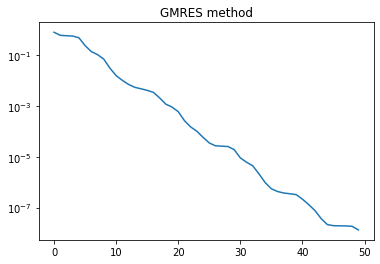

In [603]:
A = np.array([[5,4,4,-1,0], [3,12,4,-5,-5], [-4,2,6,0,3], [4,5,-7,10,2], [1,2,5,3,10]])
b = np.array([1,1,1,1,1])
x_start = np.array([0,0,0,0,0])


x_GMRES1, r_GMRES1 = GMRES1(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_GMRES1)
plt.title("GMRES method")
plt.show()

In [604]:
def GMRES2(A,x,b,max_iter = 50,epsilon = 10e-10):
    norm_b = la.norm(b)
    r_vector = []
    Rk = np.zeros((2, len(x)))
    RkT = Rk.transpose()
    for i in range(max_iter):
        Rk[1] = Rk[0]
        Rk[0] = b - A @ x
        alpha =la.inv(Rk @ A.transpose() @ A @ Rk.transpose() + np.array([[0.001,0],[0,0.01]])) @ (Rk[0] @ A @ Rk.transpose())
        x = x + alpha @ Rk
        r_norm = la.norm(A @ x - b)
        r_vector.append(r_norm)
        if r_norm / norm_b < epsilon:
            break
    return x,r_vector

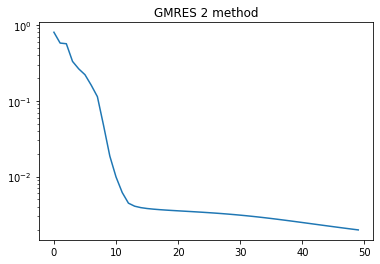

In [605]:
A = np.array([[5,4,4,-1,0], [3,12,4,-5,-5], [-4,2,6,0,3], [4,5,-7,10,2], [1,2,5,3,10]])
b = np.array([1,1,1,1,1])
x_start = np.array([0,0,0,0,0])


x_GMRES2, r_GMRES2 = GMRES2(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_GMRES2)
plt.title("GMRES 2 method")
plt.show()


Jacobi method took 56 iteration
The solution we found is : [ 1.24914744  0.58248078  0.91594555 -0.08364441 -0.09109837 -0.59296374
 -0.13844836 -0.54941049  0.27058021 -0.37521574]


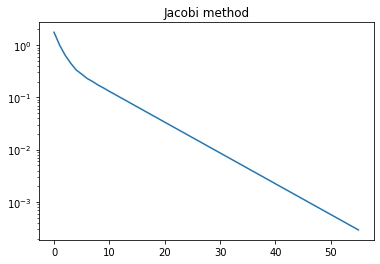

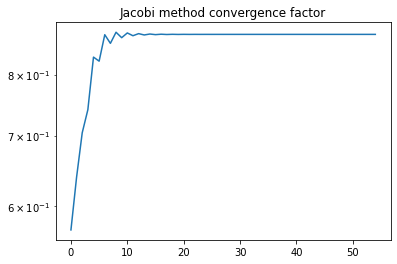

In [606]:
L = np.array(
    [[2, -1, -1, 0, 0, 0, 0, 0, 0, 0],
[-1, 2, -1, 0, 0, 0, 0, 0, 0, 0],
[-1, -1, 3 ,-1, 0, 0, 0, 0, 0, 0],
[0, 0, -1, 5, -1, 0, -1, 0, -1, -1],
[0, 0, 0, -1, 4, -1, -1, -1, 0, 0],
[0, 0, 0, 0, -1, 3, -1, -1, 0, 0],
[0, 0, 0, -1, -1, -1, 5, -1, 0, -1],
[0, 0, 0, 0, -1, -1, -1, 4, 0, -1],
[0, 0, 0, -1, 0, 0, 0, 0, 2, -1],
[0, 0, 0, -1, 0, 0, -1, -1, -1, 4]])
b_L = np.array([1,-1,1,-1,1,-1,1,-1,1,-1])
x_start_ = np.zeros(10)
x_jacobi,r_jacobi = jacobi(L,x_start_,b_L,w=1)
print(f'Jacobi method took {len(r_jacobi)} iteration')
print(f'The solution we found is : {x_jacobi}')
plt.semilogy(r_jacobi)
plt.title("Jacobi method")
plt.show()
plt.semilogy(np.divide(r_jacobi[1:],r_jacobi[0:-1]))
plt.title("Jacobi method convergence factor")
plt.show()

In [607]:
M = np.diag(np.diag(L))
M_inv = la.inv(M)
w,v = la.eig(np.identity(len(L)) - (M_inv@L))
print(f'The biggest egan value is {sorted(w)[-2]}')

The biggest egan value is 0.8732094848487588


In [608]:
from scipy.linalg import block_diag
def jacobi2(A,x,b,max_iter = 100,epsilon = 10e-5,w=1/100):
    M1 = np.array([A[i][:3] for i in range (3)])
    M2 = np.array([A[i][3:11] for i in range (3,10)])
    M1_inv = la.inv(M1)
    M2_inv = la.inv(M2)
    norm_b = la.norm(b)
    D_inv = block_diag(M1_inv,M2_inv)
    r_vector = []
    for i in range(max_iter):
        x = x + w * D_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector,D_inv



Jacobi method took 10 iteration
The solution we found is : [ 0.83327894  0.16661621  0.49994757 -0.49994757 -0.50752328 -1.00941426
 -0.55487149 -0.96585391 -0.145783   -0.79161252]


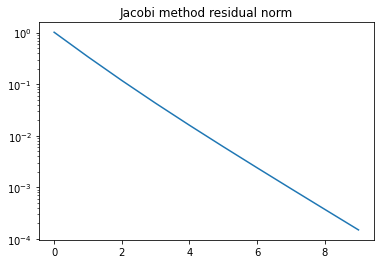

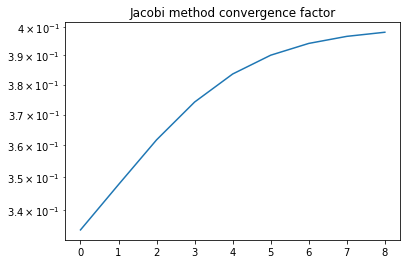

In [609]:
x_start_ = np.zeros(10)
x_jacobi,r_jacobi,D_inv = jacobi2(L,x_start_,b_L,w=0.7)
print(f'Jacobi method took {len(r_jacobi)} iteration')
print(f'The solution we found is : {x_jacobi}')
plt.semilogy(r_jacobi)
plt.title("Jacobi method residual norm")
plt.show()
plt.semilogy(np.divide(r_jacobi[1:],r_jacobi[0:-1]))
plt.title("Jacobi method convergence factor")
plt.show()

In [610]:
import scipy
w,v = scipy.linalg.eig(np.identity(len(L)) - (D_inv@L))
print(f'The biggest egan value is {sorted(w)[-2]}')

The biggest egan value is (9.226504378674992e-16+3.2005657397789663e-16j)


In [611]:
def jacobi3(A,x,b,max_iter = 100,epsilon = 10e-5,w=1/100):
    M1 = np.array([A[i][:3] for i in range (3)])
    M2 = np.array([A[i][3:6] for i in range (3,6)])
    M3 = np.array([A[i][6:] for i in range (6,10)])
    M1_inv = la.inv(M1)
    M2_inv = la.inv(M2)
    M3_inv = la.inv(M3)
    norm_b = la.norm(b)
    D_inv = block_diag(M1_inv,M2_inv,M3_inv)
    r_vector = []
    for i in range(max_iter):
        x = x + w * D_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector


def swap(matrix,sol,i,j):
    temp_row = matrix[i]
    matrix[i] = matrix[j]
    matrix[j] = temp_row
    temp = sol[i]
    sol[i] = sol[j]
    sol[j] = temp



first partition: Jacobi method took 20 iteration
The solution we found is :
 [ 1.39997384  0.73330717  1.06664051  0.06669878  0.05923429 -0.44263184
  0.0118687  -0.39908567  0.42085508 -0.22493035]
second partition: Jacobi method took 22 iteration
The solution we found is : 
 [ 0.83333333  0.16666667  0.5        -0.5        -0.50748715 -1.00947361
 -0.55493742 -0.9659249  -0.14583748 -0.79167495]
third partition:Jacobi method took 100 iteration
The solution we found is :
 [-6.76577090e+01 -6.83243756e+01 -6.79910423e+01 -6.99939646e+01
 -2.10216470e+14 -1.07890512e+15 -2.15324431e+14 -2.58389317e+14
 -6.76733925e+13 -1.35346785e+14]


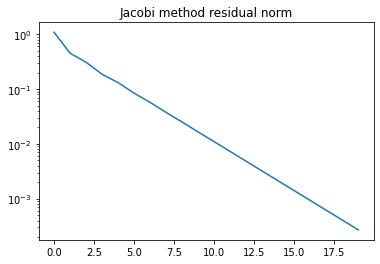

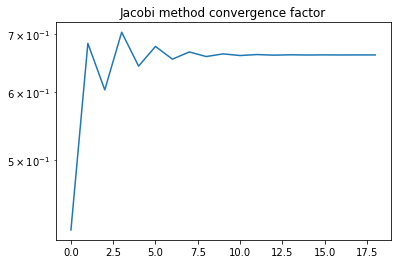

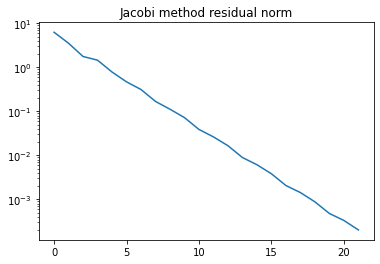

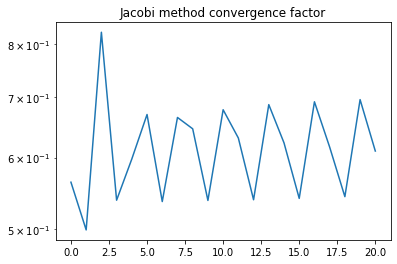

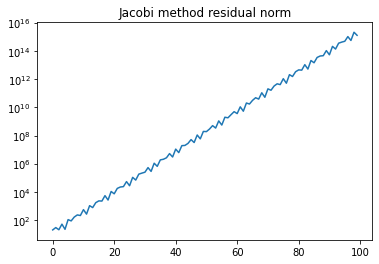

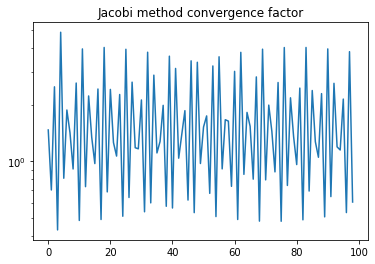

In [612]:
x_start_ = np.zeros(10)
x_jacobi,r_jacobi = jacobi3(L,x_start_,b_L,w=0.7)
print(f'first partition: Jacobi method took {len(r_jacobi)} iteration')
print(f'The solution we found is :\n {x_jacobi}')
plt.semilogy(r_jacobi)
plt.title("Jacobi method residual norm")
plt.show()
plt.semilogy(np.divide(r_jacobi[1:],r_jacobi[0:-1]))
plt.title("Jacobi method convergence factor")
plt.show()



L1 = np.array(L)
b1 = np.array(b_L)
swap(L1,b1,4,8)
x_jacobi,r_jacobi = jacobi3(L1,x_start_,b1,w=0.7)
print(f'second partition: Jacobi method took {len(r_jacobi)} iteration')
print(f'The solution we found is : \n {x_jacobi}')
plt.semilogy(r_jacobi)
plt.title("Jacobi method residual norm")
plt.show()
plt.semilogy(np.divide(r_jacobi[1:],r_jacobi[0:-1]))
plt.title("Jacobi method convergence factor")
plt.show()

L2 = np.array(L)
b2 = np.array(b_L)
swap(L2,b2,5,8)
x_jacobi,r_jacobi = jacobi3(L2,x_start_,b2,w=0.7)
print(f'third partition:Jacobi method took {len(r_jacobi)} iteration')
print(f'The solution we found is :\n {x_jacobi}')
plt.semilogy(r_jacobi)
plt.title("Jacobi method residual norm")
plt.show()
plt.semilogy(np.divide(r_jacobi[1:],r_jacobi[0:-1]))
plt.title("Jacobi method convergence factor")
plt.show()



